In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

##FEATURE EXTRACTION WITHOUT DATA AUGMENTATION


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir       = "/content/drive/MyDrive/cat and dog"
train_dir      = "/content/drive/MyDrive/cat and dog/train"
validation_dir = "/content/drive/MyDrive/cat and dog/validation"
test_dir       = "/content/drive/MyDrive/cat and dog/test"

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 30

def extract_features(directory, sample_count):   
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
                                       directory,
                                       target_size=(150, 150),
                                       batch_size=batch_size,
                                       class_mode='binary')

    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
        
            break
    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir,2000 )
validation_features, validation_labels = extract_features(validation_dir,1000 )
test_features, test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=30,
validation_data=(validation_features, validation_labels))

Epoch 1/30
67/67 [==============================] - 2s 11ms/step - loss: 0.6390 - acc: 0.6270 - val_loss: 0.4750 - val_acc: 0.7900
Epoch 2/30
67/67 [==============================] - 1s 8ms/step - loss: 0.4671 - acc: 0.7765 - val_loss: 0.4071 - val_acc: 0.8200
Epoch 3/30
67/67 [==============================] - 0s 7ms/step - loss: 0.3864 - acc: 0.8245 - val_loss: 0.3732 - val_acc: 0.8400
Epoch 4/30
67/67 [==============================] - 1s 8ms/step - loss: 0.3402 - acc: 0.8585 - val_loss: 0.3477 - val_acc: 0.8470
Epoch 5/30
67/67 [==============================] - 0s 7ms/step - loss: 0.3122 - acc: 0.8710 - val_loss: 0.3360 - val_acc: 0.8550
Epoch 6/30
67/67 [==============================] - 0s 7ms/step - loss: 0.2921 - acc: 0.8775 - val_loss: 0.3243 - val_acc: 0.8530
Epoch 7/30
67/67 [==============================] - 0s 7ms/step - loss: 0.2721 - acc: 0.8865 - val_loss: 0.3298 - val_acc: 0.8520
Epoch 8/30
67/67 [==============================] - 1s 8ms/step - loss: 0.2535 - acc: 0.9

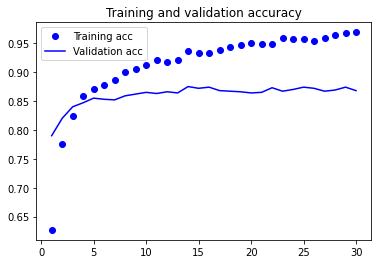

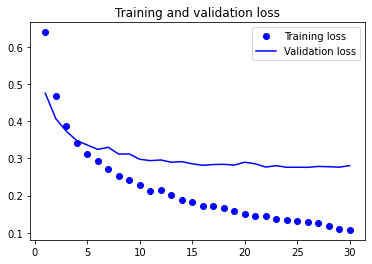

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##FEATURE EXTRACTION WITH DATA AUGMENTATION


In [ ]:
import tensorflow
from tensorflow import keras
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


In [ ]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir       = "/content/drive/MyDrive/cat and dog"
train_dir      = "/content/drive/MyDrive/cat and dog/train"
validation_dir = "/content/drive/MyDrive/cat and dog/validation"
test_dir       = "/content/drive/MyDrive/cat and dog/test"

train_datagen = ImageDataGenerator(
                                 rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

Validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                train_dir,
                                                target_size=(150, 150),
                                                batch_size=20,
                                                class_mode='binary')

validation_generator = Validation_datagen.flow_from_directory(
                                                validation_dir,
                                                target_size=(150, 150),
                                                batch_size=20,
                                                class_mode='binary')

def extract_features(directory, sample_count):   
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
                                       directory,
                                       target_size=(150, 150),
                                       batch_size=batch_size,
                                       class_mode='binary')

    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
        
            break
    return features, labels

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features, train_labels = extract_features(train_dir,2000 )
validation_features, validation_labels = extract_features(validation_dir,1000 )
test_features, test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                               loss='binary_crossentropy',
                                metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=30,
validation_data=(validation_features, validation_labels))

Epoch 1/30
67/67 [==============================] - 1s 9ms/step - loss: 0.6215 - acc: 0.6535 - val_loss: 0.4701 - val_acc: 0.8190
Epoch 2/30
67/67 [==============================] - 1s 8ms/step - loss: 0.4549 - acc: 0.7950 - val_loss: 0.4019 - val_acc: 0.8400
Epoch 3/30
67/67 [==============================] - 1s 8ms/step - loss: 0.3789 - acc: 0.8400 - val_loss: 0.3725 - val_acc: 0.8440
Epoch 4/30
67/67 [==============================] - 0s 7ms/step - loss: 0.3351 - acc: 0.8635 - val_loss: 0.3503 - val_acc: 0.8510
Epoch 5/30
67/67 [==============================] - 0s 7ms/step - loss: 0.3105 - acc: 0.8660 - val_loss: 0.3314 - val_acc: 0.8580
Epoch 6/30
67/67 [==============================] - 1s 8ms/step - loss: 0.2845 - acc: 0.8770 - val_loss: 0.3226 - val_acc: 0.8620
Epoch 7/30
67/67 [==============================] - 1s 8ms/step - loss: 0.2685 - acc: 0.8855 - val_loss: 0.3102 - val_acc: 0.8640
Epoch 8/30
67/67 [==============================] - 1s 8ms/step - loss: 0.2563 - acc: 0.89

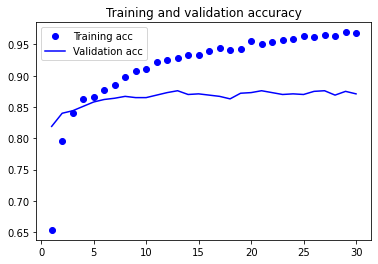

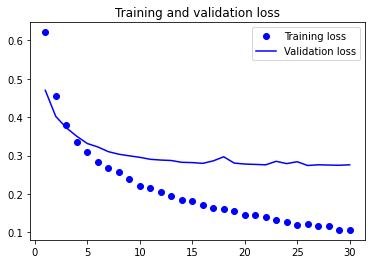

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('cat_and_dog.h5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


##FEATURE EXTRACTION WITH DATA AUGMENTATION


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

base_dir       = "/content/drive/MyDrive/cat and dog"
train_dir      = "/content/drive/MyDrive/cat and dog/train"
validation_dir = "/content/drive/MyDrive/cat and dog/validation"
test_dir       = "/content/drive/MyDrive/cat and dog/test"

train_datagen = ImageDataGenerator(
                                  rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
                                          train_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                                          validation_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 48s 426ms/step - loss: 0.4497 - acc: 0.7755 - val_loss: 0.2337 - val_acc: 0.8890
Epoch 2/30
100/100 [==============================] - 42s 421ms/step - loss: 0.2703 - acc: 0.8800 - val_loss: 0.3936 - val_acc: 0.8630
Epoch 3/30
100/100 [==============================] - 42s 420ms/step - loss: 0.1991 - acc: 0.9115 - val_loss: 0.1358 - val_acc: 0.9480
Epoch 4/30
100/100 [==============================] - 42s 420ms/step - loss: 0.1574 - acc: 0.9345 - val_loss: 0.1226 - val_acc: 0.9510
Epoch 5/30
100/100 [==============================] - 42s 421ms/step - loss: 0.1627 - acc: 0.9355 - val_loss: 0.1596 - val_acc: 0.9320
Epoch 6/30
100/100 [==============================] - 42s 420ms/step - loss: 0.1299 - acc: 0.9505 - val_loss: 0.1345 - val_acc: 0.9510
Epoch 7/30
100/100 [==============================] - 42s 420ms/step - loss: 0.1019 - acc: 0.9535 - val_loss: 0.1191 - val_acc: 0.9570
Epoch 8/30
100/100 [==============================] - 4

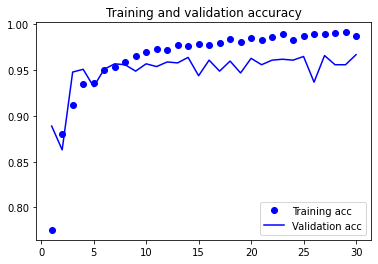

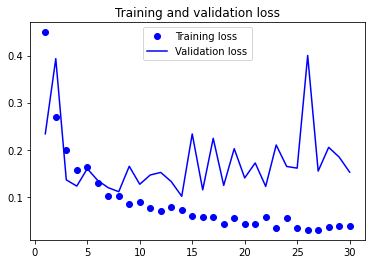

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('cats_and_dogs_96.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

NameError: ignored